## Dichteverteilung der österreichischen Bruttogrundflächen

Die Zahlen zu BGF stammen von der letzten Registerzählung der Statistik Austria im Jahr 2011.
Die Flächen der bebauten Gundstücke sind in einer Studie der österreichischen Baulandreserven des UBA aus 2013 zusammengefasst.
Die Aggregationsebene ist in beiden Fällen der Bezirk.

761.0 mio m²


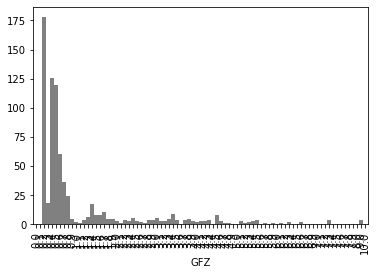

In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel("../data/gfz_analysis.xlsx", sheet_name="python") # mio m2
df.index = df.GFZ
#df = df[df.index < 5.2]
ax = df.BGF.plot(kind="bar", width=1, color="grey")
print(df.BGF.sum().round(), "mio m²")


Festlegung der Gebäude-Typologien bzw Klassen hinsichtlich erreichbarer PE-Bilanz

In [59]:
from pathlib import Path
from utils.datahandling import EMA_EXCEL_PATH

ema_spez = pd.read_excel(EMA_EXCEL_PATH, sheet_name="AT_EVspezifisch_kWh_m2", index_col=3).drop(["Bezirkscode", "Gemeindecode", "Einwohner 2019", "Bezirksname", "Wohnfläche insgesamt (m²)"], axis=1)


len(ema_spez)
# Anzahl Gemeinden in Österreich

2118

In [60]:
ema_spez.mean()
# average Energs /kWh/m²

Einfamilien-/Doppelhäuser vor 1919 (kWh/m²a)     222.212838
Einfamilien-/Doppelhäuser 1919-1944 (kWh/m²a)    230.544545
Einfamilien-/Doppelhäuser 1945-1960 (kWh/m²a)    266.902261
Einfamilien-/Doppelhäuser 1961-1970 (kWh/m²a)    232.950166
Einfamilien-/Doppelhäuser 1971-1980 (kWh/m²a)    205.856319
Einfamilien-/Doppelhäuser 1981-1990 (kWh/m²a)    187.743184
Einfamilien-/Doppelhäuser 1991-2000 (kWh/m²a)    149.584495
Einfamilien-/Doppelhäuser 2001-2011 (kWh/m²a)    108.614035
Mehrfamilienhäuser vor 1919 (kWh/m²a)            131.381437
Mehrfamilienhäuser 1919-1944 (kWh/m²a)            91.497125
Mehrfamilienhäuser 1945-1960 (kWh/m²a)           136.078007
Mehrfamilienhäuser 1961-1970 (kWh/m²a)           128.669395
Mehrfamilienhäuser 1971-1980 (kWh/m²a)           116.016138
Mehrfamilienhäuser 1981-1990 (kWh/m²a)           102.303928
Mehrfamilienhäuser 1991-2000 (kWh/m²a)            92.874737
Mehrfamilienhäuser 2001-2011 (kWh/m²a)            79.559957
dtype: float64

<AxesSubplot:>

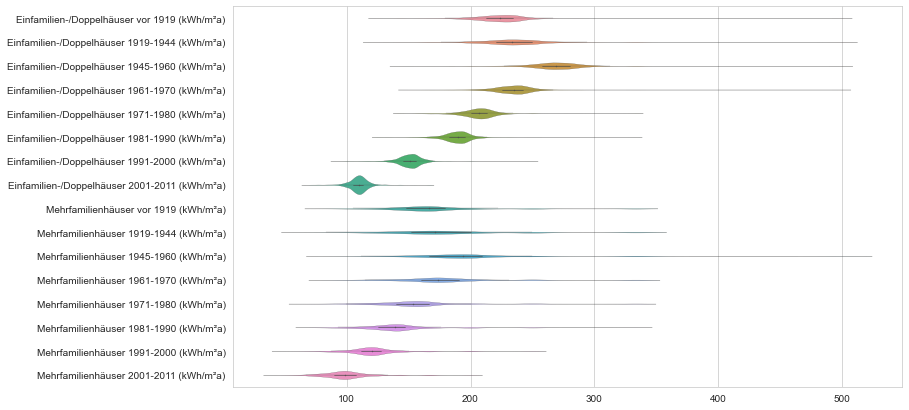

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
ema_spez = ema_spez.replace(0, np.NAN)
fig, ax = plt.subplots(figsize=(12,7))
sns.set_style("whitegrid")
sns.violinplot(data=ema_spez, linewidth=0.2, orient="horizontal")

<AxesSubplot:>

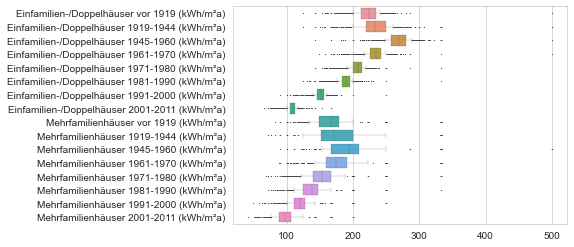

In [57]:

sns.boxplot(data=ema_spez, orient="horizontal",whis=[10, 90], linewidth=.2, fliersize=0.3)